In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/__script__.py
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/nvidia_nccl_cu12-2.28.7-py3-none-manylinux_2_18_x86_64.whl
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/__results__.html
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/joblib-1.5.2-py3-none-any.whl
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/input_requirements.txt
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/threadpoolctl-3.6.0-py3-none-any.whl
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/xgboost-3.0.5-py3-none-manylinux_2_28_x86_64.whl
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/__script__.ipynb
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/__output__.json
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/numpy-2.3.4-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl
/kaggle/input/pm-96351429-at-10-24-2025-06-55-15/

# IMPORTING REQUIRED PACKAGES

In [2]:
# CHECK SKLEARN VERSION AND XGBOOST VERSION
import sklearn
import xgboost
# restart one time to get  packages scikit-learn version: 1.5.2 , XGBoost version: 3.0.5
print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


scikit-learn version: 1.5.2
XGBoost version: 3.0.5


In [3]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing train.csv, test.csv and sample_submission.csv 

In [4]:
Traindf =  pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/train.csv")
Testdf = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/test.csv")
sample_submission = pd.read_csv("/kaggle/input/mlp-term-3-2025-kaggle-assignment-1/sample_submission.csv")

print(f"Training data shape: {Traindf.shape} \n")
print("Training data:")
print(Traindf.head(4))

print(f"Testing data shape: {Testdf.shape} \n")
print("Testing data:")
print(Testdf.head(4))
print(f"sample submission data shape: {sample_submission.shape} \n")
print("Sample submission:")
print(sample_submission.head(4))

Training data shape: (10000, 9) 

Training data:
   id area_type   availability                 location   size  total_sqft  \
0   0    type_I  Ready To Move  Banashankari 2 nd Stage  3 BHK      1030.0   
1   1    type_I  Ready To Move                 Balagere  2 BHK      1210.0   
2   2    type_I         17-Oct     Banashankari Stage V  3 BHK      1540.0   
3   3    type_I  Ready To Move           Thigalarapalya  3 BHK      1830.0   

   bath  balcony   price  
0   2.0      2.0   77.25  
1   2.0      1.0   83.00  
2   3.0      2.0   48.51  
3   4.0      2.0  135.00  
Testing data shape: (3320, 8) 

Testing data:
   id area_type   availability        location       size  total_sqft  bath  \
0   0   type_II  Ready To Move  Banjara Layout  2 Bedroom      1050.0   2.0   
1   1    type_I  Ready To Move     Rajiv Nagar      3 BHK      1690.0   3.0   
2   2   type_II  Ready To Move          Hebbal      2 BHK      1100.0   2.0   
3   3  type_III  Ready To Move     Munnekollal  6 Bedroom      

We can see from sample_submission that our submission should have id and price.

# Column type analysis and review of the training dataset

In [5]:
# info for every columns for out dataset for better understand of the data type and null values.
print(Traindf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   area_type     10000 non-null  object 
 2   availability  10000 non-null  object 
 3   location      9999 non-null   object 
 4   size          9987 non-null   object 
 5   total_sqft    9967 non-null   float64
 6   bath          9936 non-null   float64
 7   balcony       9525 non-null   float64
 8   price         10000 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB
None


There are some null values presend for columns like location, size, total_sqft, batch and balcony

In [6]:
# Checking unique values for some column to check any missing values and data entry mistake
print(f"Unique values for Area_type {Traindf['area_type'].unique()} \n")
print(f"Unique values for availability{Traindf['availability'].unique()}\n")
print(f"Unique values for location {Traindf['location'].unique()}\n")
print(f"Unique values for size {Traindf['size'].unique()}\n")


Unique values for Area_type ['type_I' 'type_III' 'type_II' 'type_IV'] 

Unique values for availability['Ready To Move' '17-Oct' '18-Nov' '18-May' '20-Dec' '18-Apr' '19-Dec'
 '19-Jul' '18-Aug' '18-Dec' '19-Aug' '22-Dec' '18-Mar' '19-Mar' '19-Jan'
 '18-Oct' '20-Jul' '18-Sep' '18-Jun' '18-Feb' 'Immediate Possession'
 '17-Jun' '15-Oct' '21-Jun' '18-Jul' '17-Dec' '19-Oct' '18-Jan' '17-May'
 '19-Jun' '21-Dec' '19-Sep' '21-Jan' '22-May' '19-Apr' '20-Jun' '20-Jan'
 '22-Jun' '17-Jul' '20-Aug' '22-Jan' '16-Sep' '21-Mar' '19-Nov' '20-Apr'
 '20-Feb' '20-Oct' '17-Sep' '17-Nov' '21-May' '21-Oct' '21-Feb' '17-Feb'
 '17-Apr' '21-Sep' '19-Feb' '19-May' '20-Sep' '16-Dec' '21-Jul' '17-Aug'
 '14-Jul' '20-May' '16-Jul' '17-Mar' '21-Aug' '15-Nov' '17-Jan' '16-Mar'
 '21-Nov' '15-Jun' '22-Mar' '20-Nov' '20-Mar' '16-Oct' '15-Dec']

Unique values for location ['Banashankari 2 nd Stage' 'Balagere' 'Banashankari Stage V' ...
 'T c palya' 'Jaraganahalli Jp Nagar Post' 'Banaswadi, ']

Unique values for size ['3 BHK

There are some issue with the data especially in size column as 4BHK and 4 Bedroom have same meanings.
There are no unknown values other then NaN.

In [7]:
# some  statistics operations on numeric columns
Traindf[["total_sqft","bath","balcony","price"]].describe()

,total_sqft,bath,balcony,price
count,9967.000000,9936.000000,9525.000000,10000.000000
mean,1570.095822,2.692029,1.585302,113.275879
std,1302.566836,1.274172,0.814347,151.802643
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1279.000000,2.000000,2.000000,72.000000
75%,1682.500000,3.000000,2.000000,120.000000
max,52272.000000,18.000000,3.000000,3600.000000


Columns like total_sqft and price are **right-skewed** as their mean is significantly greater then their median(50%)
min value for total_sqft is 1 which might be a result of some error.

# Handling Missing values for our dataset.

In [8]:
# Checking the number of values missing for each column
print("Missing values in train data \n")
print(Traindf.isnull().sum())

print("missing values in test data \n")
print(Testdf.isnull().sum())

Missing values in train data 

id                0
area_type         0
availability      0
location          1
size             13
total_sqft       33
bath             64
balcony         475
price             0
dtype: int64
missing values in test data 

id                0
area_type         0
availability      0
location          0
size              3
total_sqft       13
bath              9
balcony         134
dtype: int64


Balcony has a lot of missing values as compared to the others columns.

* we will impute the mode value for the missing location, size, bath.
* we will impute the median for total_sqft, balcony.

Reason:
Mode is used for columns those have either **categorical_features(location, size)** or have integer values like **(bath, balcony)**.

Median is used for columns those have **float values(total_sqft)**. Median is used insted of mean to prevent impute from outliers.

In [9]:
# importing required packages for imputing the missing data.
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

mode_imputer = SimpleImputer(strategy="most_frequent")
median_imputer = SimpleImputer(strategy="median")

cat_cols = ["location","size","bath","balcony"]
num_cols = ["total_sqft"]

preprocessor = ColumnTransformer(transformers=[
    ("mode_imputer" , mode_imputer, cat_cols),
    ("median_imputer" , median_imputer , num_cols)
])

imputer_pipeline = Pipeline(steps=[
        ("imputation",preprocessor)
    ])

# Fitting to Training Data
imputer_pipeline.fit(Traindf[cat_cols + num_cols])

# Transforming Training Data
Traindf_imputed = pd.DataFrame(imputer_pipeline.transform(Traindf[cat_cols + num_cols]), columns=cat_cols + num_cols , index=Traindf.index )

# Transforming Testing Data
Testdf_imputed = pd.DataFrame(imputer_pipeline.transform(Testdf[cat_cols + num_cols]), columns=cat_cols + num_cols, index=Testdf.index )

Traindf[cat_cols + num_cols] = Traindf_imputed
Testdf[cat_cols + num_cols] = Testdf_imputed

#Converting back to integer and float
Traindf[["bath","balcony"]] = Traindf[["bath","balcony"]].astype(int)
Traindf["total_sqft"] = Traindf["total_sqft"].astype(int)
Testdf[["bath","balcony"]] = Testdf[["bath","balcony"]].astype(int)
Testdf["total_sqft"] = Testdf["total_sqft"].astype(int)


print(f" Training data: \n {Traindf.isna().sum()}")
print(f" Testing data: \n {Testdf.isna().sum()}")

 Training data: 
 id              0
area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64
 Testing data: 
 id              0
area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
dtype: int64


Missing values for both Training Data and Testing Data are imputed.

# Checking for duplicate rows 

In [10]:
print(f"Duplicate rows in Training data: {Traindf[Traindf.columns[1:]].duplicated().sum()}")
Traindf = Traindf[~Traindf[Traindf.columns[1:]].duplicated()]


Duplicate rows in Training data: 362


We will drop the duplicates.

# Handling Outliers

## For Price

In [11]:
# price plot to check for outliers
plot1 = px.box(Traindf , x="price")
plot1.update_layout(title="Box Plot of Property Prices")
plot1.show() 


### There are a lot of outliers for price of the property and it could be possible as some properties are more expensive then other due to same factors like favourable location or a large property so we will not do anything to these outliers.

In [12]:
# Some outlier rows for price
Traindf[Traindf["price"]> 2000]

,id,area_type,availability,location,size,total_sqft,bath,balcony,price
156,156,type_II,Ready To Move,Yemlur,4 Bedroom,7000,5,2,2050.0
405,405,type_I,19-Jan,Malleshwaram,7 BHK,12000,7,3,2200.0
562,562,type_III,Ready To Move,Dollars Colony,4 Bedroom,4350,8,2,2600.0
2904,2904,type_III,18-Sep,Bommenahalli,4 Bedroom,2940,3,2,2250.0
2932,2932,type_III,18-Jul,Dodsworth Layout,4 Bedroom,30000,4,2,2100.0
3188,3188,type_III,Ready To Move,Sadashiva Nagar,5 Bedroom,9600,7,2,2736.0
6042,6042,type_I,Ready To Move,Shanthala Nagar,5 BHK,8321,5,3,2700.0
6140,6140,type_III,Ready To Move,Ramakrishnappa Layout,4 Bedroom,9200,4,2,2600.0
9864,9864,type_III,Ready To Move,Defence Colony,10 Bedroom,7150,13,2,3600.0
9949,9949,type_I,18-Jan,Ashok Nagar,4 BHK,8321,5,2,2912.0


These expensive outlier are properties with high count of bathrooms and size.

## For sqft

In [13]:
plot2 = px.box(Traindf , x="total_sqft")
plot2.update_layout(title="Box Plot of Total Sqft")


plot2.show()


In [14]:
# low sqft outliers
Traindf[Traindf["total_sqft"] < 250]

,id,area_type,availability,location,size,total_sqft,bath,balcony,price
672,672,type_III,18-Dec,Suragajakkanahalli,3 Bedroom,11,3,2,74.0
1035,1035,type_IV,Ready To Move,Weavers Colony,1 BHK,15,1,0,30.0
2453,2453,type_III,Ready To Move,Mysore Road,1 Bedroom,45,1,0,23.0
4120,4120,type_III,Ready To Move,Sarjapur Road,4 Bedroom,1,4,2,120.0
5705,5705,type_III,19-Oct,Whitefield,4 Bedroom,60,4,2,218.0
9361,9361,type_II,Ready To Move,Grihalakshmi Layout,5 Bedroom,24,2,2,150.0


### Some of the properties are listed with sqft as 1 which is not possile. To fix this issue we will replace every sqft value which is less then 250 with 250 both for training and testing data.

In [15]:
Traindf.loc[Traindf["total_sqft"] < 250 , "total_sqft" ] = 250
Testdf.loc[Testdf["total_sqft"] < 250 , "total_sqft"] = 250

### For Outliers with super high values greater them 30000 we will remove them

In [16]:
Traindf.drop(Traindf[Traindf["total_sqft"] > 30000].index, inplace=True)

## For bathroom

In [17]:
plot3 = px.box(Traindf , x="bath")
plot3.update_layout(title="Box Plot of numbers of bathrooms")
plot3.show()


In [18]:
Traindf[Traindf["bath"] > 12]

,id,area_type,availability,location,size,total_sqft,bath,balcony,price
2053,2053,type_I,Ready To Move,Koramangala Industrial Layout,16 BHK,10000,16,2,550.0
4182,4182,type_I,Ready To Move,1Hoysalanagar,13 BHK,5425,13,0,275.0
6551,6551,type_I,Ready To Move,1Channasandra,14 BHK,1250,15,0,125.0
6860,6860,type_III,18-Feb,Electronic City,9 Bedroom,1200,13,2,150.0
8698,8698,type_III,18-Apr,1Kasavanhalli,18 Bedroom,1200,18,2,200.0
9864,9864,type_III,Ready To Move,Defence Colony,10 Bedroom,7150,13,2,3600.0


We will not remove outliers of bathroom as they are the house with high price and high number of bedroom so it might be possible to have them.

## For balcony

In [19]:
plot4 = px.box(Traindf , x="balcony")
plot4.update_layout(title="Box Plot of numbers of Balcony")
plot4.show()


Balcony Does not have any outlier and min and max values are also reasonable.

# Data Analysis

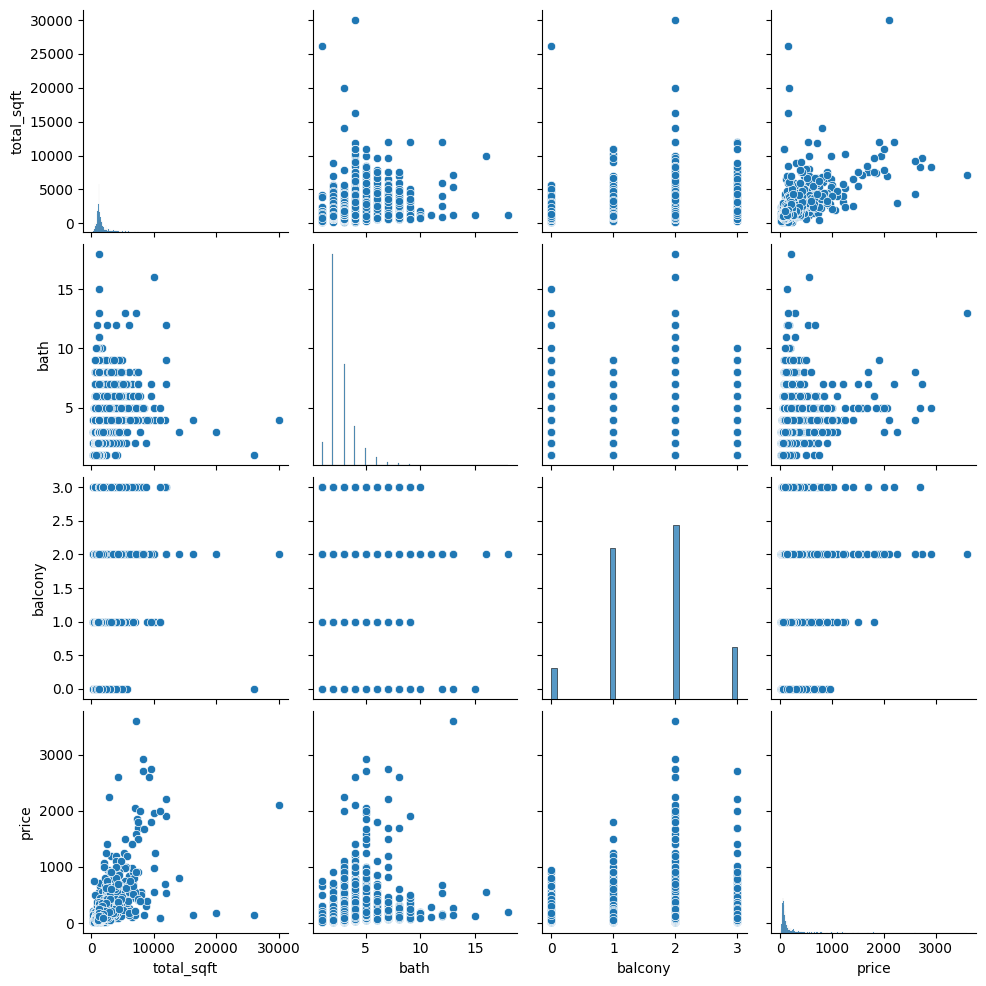

In [20]:
import warnings        # to remove unwanted warning from sns
warnings.filterwarnings('ignore')

plot1 = px.scatter(Traindf ,x="total_sqft" , y="price" , color="bath", trendline="ols"  )
plot1.update_layout(title= "SQFT vs Price")
plot1.show()

plot2 = px.scatter(Traindf ,x="area_type" , y="price" , color="balcony")
plot2.update_layout(title= "Area Type vs Price")
plot2.show()

plot3 = px.scatter(Traindf ,x="balcony" , y="price" , color="bath")
plot3.update_layout(title= "Balcony vs Price")
plot3.show()


plot4 = px.scatter(Traindf ,x="size" , y="price" , color="total_sqft")
plot4.update_layout(title= "size vs Price")
plot4.show()

sns.pairplot(Traindf[["total_sqft" , "bath" , "balcony" , "price"]])

### INSIGHTS:

* Price and Sqft have a strong increasing relationship.
* Some area types like Type3 and Type1 are more expensive then others.
* Both bathroom and balcony influence the price a lot. 


# Feature Engineering

In [21]:
# room
Traindf["rooms"] = Traindf["size"].apply(lambda x : int(x.split()[0]))
Testdf["rooms"] = Testdf["size"].apply(lambda x : int(x.split()[0]))

# bathroom per room
Traindf["bath_per_room"] = Traindf["bath"] / Traindf["rooms"]
Testdf["bath_per_room"] = Testdf["bath"] / Testdf["rooms"]

# # facilities
# Traindf["total_facilities"] = Traindf["bath"] + Traindf["balcony"]
# Testdf["total_facilities"] = Testdf["bath"] + Testdf["balcony"]

# # Balcony per room
# Traindf["balcony_per_room"] = Traindf["balcony"] / Traindf["rooms"]
# Testdf["balcony_per_room"] = Testdf["balcony"] / Testdf["rooms"]

# # luxury score
# Traindf["luxury_score"] = Traindf["balcony_per_room"] + Traindf["bath_per_room"]
# Testdf["luxury_score"] = Testdf["balcony_per_room"] + Testdf["bath_per_room"]

# # Interaction features
# Traindf["room_sqft_interaction"] = Traindf["rooms"] * Traindf["total_sqft"]
# Testdf["room_sqft_interaction"] = Testdf["rooms"] * Testdf["total_sqft"]

# Train and Validation split

In [22]:
from sklearn.model_selection import train_test_split

train , validation = train_test_split(Traindf ,test_size=0.2, random_state=42)
print(f"Training data shape: {train.shape}")
print(f"validation data shape: {validation.shape}")

Training data shape: (7707, 11)
validation data shape: (1927, 11)


In [23]:
model_input = Testdf.columns.tolist()[1:]
train_input = train[model_input]
train_output = train["price"]
validation_input = validation[model_input]
validation_output = validation["price"]

print(f"Train input \n {train_input.shape}\n")
print(f"Train output \n {train_output.shape}\n")
print(f"validation input \n {validation_input.shape}\n")
print(f"validation output \n {validation_output.shape}\n")

Train input 
 (7707, 9)

Train output 
 (7707,)

validation input 
 (1927, 9)

validation output 
 (1927,)



# Scaling and encoding

### Now we will scale the data for numeric features we will use RobustScaler as it is less sensitive to outliers and do one-hot encoding for categorical features.

In [24]:
from sklearn.preprocessing import RobustScaler , OneHotEncoder , StandardScaler

scaler = StandardScaler()
hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

numeric_columns = ["total_sqft", "bath", "balcony", "rooms",  "bath_per_room"]
categorical_column = ["area_type", "availability", "location", "size"]

processor = ColumnTransformer(transformers=[
    ("scaler", scaler , numeric_columns ),
    ("encoder",hot_encoder , categorical_column)
] , remainder="passthrough")

hot_scale = Pipeline(steps=[
    ("scale_and_encode" , processor)
])

hot_scale.fit(train_input)

final_train_input = pd.DataFrame(
    hot_scale.transform(train_input),
    columns=hot_scale.named_steps["scale_and_encode"].get_feature_names_out()
)

final_validation_input = pd.DataFrame(
    hot_scale.transform(validation_input),
    columns=hot_scale.named_steps["scale_and_encode"].get_feature_names_out()
)



In [25]:
final_train_input.shape

(7707, 1178)

# Training Model

## 1. Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score  #Importing R2 score 

models_performance = dict() 

linear_regression_model = LinearRegression(n_jobs=-1)

linear_regression_model.fit(final_train_input , train_output) 

print(f"Train score {linear_regression_model.score(final_train_input,train_output)}")
linear_validation_score = linear_regression_model.score(final_validation_input, validation_output)
print(f"Validation score{linear_validation_score}")

#linear Regression is performing super bad and scores are destroying the graph later so we will use 0 as score.
models_performance["LinearRegression"] = 0

Train score 0.7264020400993993
Validation score-2.2234460156128487e+20


## 2. Ridge

In [27]:
from sklearn.linear_model import Ridge

Ridge_model = Ridge(  random_state=42)
Ridge_model.fit(final_train_input , train_output)

print(f"Train score {Ridge_model.score(final_train_input,train_output)}")
Ridge_validation_score = Ridge_model.score(final_validation_input , validation_output)
print(f"Validation score {Ridge_validation_score}")

models_performance["Ridge_model"] = Ridge_validation_score

Train score 0.7067817481542371
Validation score 0.5994005092683016


## 3. Lasso 

In [28]:
from sklearn.linear_model import Lasso

Lasso_model = Lasso( alpha=1.5 ,random_state=42)
Lasso_model.fit(final_train_input , train_output)

print(f"Train score {Lasso_model.score(final_train_input,train_output)}")
Lasso_validation_score = Lasso_model.score(final_validation_input , validation_output)
print(f"Validation score {Lasso_validation_score}")

models_performance["Lasso_model"] = Lasso_validation_score

Train score 0.4882910958910236
Validation score 0.5657014479361202


## 4. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
validation_accuracy = []
train_accuracy = []
# for i in range(1,21):
#     linear_regression_model = DecisionTreeRegressor(max_depth=i, random_state=42)
#     linear_regression_model.fit(final_train_input , train_output)
#     train_accuracy.append(linear_regression_model.score(final_train_input,train_output))
#     validation_accuracy.append(linear_regression_model.score(final_validation_input , validation_output))

linear_regression_model = DecisionTreeRegressor(max_depth=2, random_state=42)
linear_regression_model.fit(final_train_input , train_output)

print(f"Train score {linear_regression_model.score(final_train_input,train_output)}")
Decision_tree_validation_score = linear_regression_model.score(final_validation_input , validation_output)
print(f"Validation score {Decision_tree_validation_score}")

models_performance["Decision_Tree"] = Decision_tree_validation_score
# plot = px.line(x=list(range(1,21)) , y=[train_accuracy , validation_accuracy] , title="Training vs Testing Error for Different Depths", labels={"x": "Tree Depth", "y": "Error"}, markers=True )
# plot.update_layout(bargap=0.2 , legend_title_text='Error Type')
# plot.update_traces(name='Training Accuracy', selector=dict(name='wide_variable_0'))
# plot.update_traces(name='Testing Accuracy', selector=dict(name='wide_variable_1'))
# plot.show()


Train score 0.4975165706143576
Validation score 0.5746902479500754


## 5. Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

validation_accuracy = []
train_accuracy = []
# for i in range(100,200,500):
#     Random_forest_model = RandomForestRegressor(n_estimators=i ,n_jobs=-1, random_state=42)
#     Random_forest_model.fit(final_train_input , train_output)
#     train_accuracy.append(Random_forest_model.score(final_train_input,train_output))
#     validation_accuracy.append(Random_forest_model.score(final_validation_input , validation_output))


Random_forest_model = RandomForestRegressor(n_estimators=300, min_samples_split=5 , min_samples_leaf=3 ,n_jobs=-1, random_state=42)
Random_forest_model.fit(final_train_input , train_output)

print(f"Train score {Random_forest_model.score(final_train_input,train_output)}")
Random_forest_validation = Random_forest_model.score(final_validation_input , validation_output)
print(f"Validation score {Random_forest_validation}")

models_performance["Random_forest"] = Random_forest_validation

# plot = px.line(x=list(range(100,500,100)) , y=[train_accuracy , validation_accuracy] , title="Training vs Testing Error for Different n_estimators", labels={"x": "Tree Depth", "y": "Error"}, markers=True )
# plot.update_layout(bargap=0.2 , legend_title_text='Error Type')
# plot.update_traces(name='Training Accuracy', selector=dict(name='wide_variable_0'))
# plot.update_traces(name='Testing Accuracy', selector=dict(name='wide_variable_1'))
# plot.show()

Train score 0.8086140705092926
Validation score 0.5393498547737021


## 6. XGBRegressor

In [31]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# xgb = XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1)

# param_dist = {
#     "n_estimators": np.arange(600, 2200,100),
#     "learning_rate": [0.03, 0.05, 0.07, 0.1 , 0.19],
#     "max_depth": [6, 8, 10, 12 ],
#     "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "reg_lambda": [0.5,0.7, 1, 2, 5],
#     "reg_alpha": [0, 0.05, 0.1, 0.3, 0.5],
#     "min_child_weight": [1, 3, 5, 7],
#     "gamma": [0, 0.1, 0.2, 0.3],
# }
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=50,   
#     scoring="r2",
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
#     random_state=42
# )

# random_search.fit(final_train_input, np.log1p(train_output))
# print("✅ Best Params:", random_search.best_params_)
# print("🏆 Best CV R²:", random_search.best_score_)

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# xgb = XGBRegressor( subsample=1 , reg_lambda=0.6 , reg_alpha=0 , n_estimators=2200 , max_depth=8 , min_child_weight=1 , learning_rate=0.19 ,colsample_bytree=0.7, objective="reg:squarederror", random_state=42, n_jobs=-1)
xgb = XGBRegressor( subsample=1 , reg_lambda=0.7 , reg_alpha=0 , n_estimators=2200 , max_depth=8 , min_child_weight=1 , learning_rate=0.19 ,colsample_bytree=0.6, objective="reg:squarederror", random_state=42, n_jobs=-1)
xgb.fit(final_train_input, np.log1p(train_output))
pred_train = np.expm1(xgb.predict(final_train_input))
pred_validation = np.expm1(xgb.predict(final_validation_input))

print(f"\n📊 Train R² score: {r2_score(train_output, pred_train):.6f}")
print(f"📊 Validation R² score: {r2_score(validation_output, pred_validation):.6f}")

models_performance["XGB"] = r2_score(validation_output, pred_validation)


📊 Train R² score: 0.991085
📊 Validation R² score: 0.654056


### Top Features importance for XGB

In [33]:
importance_dict = xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
plot = px.bar(importance_df , x="Importance" , y="Feature" , title='Top 10 XGBoost Feature Importances')
plot.show()

## 7. Neural Network

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import numpy as np

# Log-transform target
y_train_log = np.log1p(train_output)
y_val_log = np.log1p(validation_output)

mlp = MLPRegressor(
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=500,        # keep smaller for speed
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=30,
    random_state=42,
    verbose=False
)

# Search space (small & efficient)
param_dist = {
    'hidden_layer_sizes': [(64,32), (124,64,32), (128,64), (256,128,128,64,64)],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'learning_rate_init': [1e-3, 1e-4, 5e-4],
    'batch_size': [32, 64, 128]
}

# Randomized search
search = RandomizedSearchCV(
    mlp,
    param_distributions=param_dist,
    n_iter=5,            # small number of trials for faster run
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(final_train_input, y_train_log)

print("\n🏆 Best Parameters:", search.best_params_)

# Evaluate on train/validation
best_mlp = search.best_estimator_
train_pred = np.expm1(best_mlp.predict(final_train_input))
val_pred = np.expm1(best_mlp.predict(final_validation_input))

print(f"Train R²: {r2_score(train_output, train_pred):.4f}")
print(f"Validation R²: {r2_score(validation_output, val_pred):.4f}")

models_performance["Neural_network"] = r2_score(validation_output, val_pred)

Fitting 3 folds for each of 5 candidates, totalling 15 fits

🏆 Best Parameters: {'learning_rate_init': 0.0001, 'hidden_layer_sizes': (256, 128, 128, 64, 64), 'batch_size': 32, 'alpha': 0.001}
Train R²: 0.9020
Validation R²: 0.2904


# Visualizing Models performance on validation data

In [35]:
models_performance = pd.DataFrame(list(models_performance.items()) , columns=["Model" , "Score"])
plot = px.bar(models_performance , x="Score",y="Model")
plot.update_layout(title="Validation accuracy on different models")
plot.show()

# Creating final predictions for Test

In [36]:
all_train_input = Traindf[model_input]
all_train_output = Traindf["price"]

hot_scale.fit(all_train_input)

final_all_train_input = pd.DataFrame(
    hot_scale.transform(all_train_input),
    columns=hot_scale.named_steps["scale_and_encode"].get_feature_names_out()
)
final_all_train_input 

final_test_input = pd.DataFrame(
    hot_scale.transform(Testdf[model_input]),
    columns=hot_scale.named_steps["scale_and_encode"].get_feature_names_out()
)


In [37]:
from xgboost import XGBRegressor
# xgb = XGBRegressor( subsample=1 , reg_lambda=0.7 , reg_alpha=0 , n_estimators=2200 , max_depth=8 , min_child_weight=1 , learning_rate=0.19 ,colsample_bytree=0.6, objective="reg:squarederror", random_state=42, n_jobs=-1)
xgb = XGBRegressor( subsample=1 , reg_lambda=0.6 , reg_alpha=0 , n_estimators=2200 , max_depth=8 , min_child_weight=1 , learning_rate=0.19 ,colsample_bytree=0.7, objective="reg:squarederror", random_state=42, n_jobs=-1)
# xgb = XGBRegressor( subsample=0.9 , reg_lambda=0.5 , reg_alpha=0 , n_estimators=1000 , max_depth=8 , min_child_weight=1 , learning_rate=0.16 ,colsample_bytree=0.7 , objective="reg:squarederror", random_state=42, n_jobs=-1)
xgb.fit(final_all_train_input,np.log1p(all_train_output))
train_pred = np.expm1(xgb.predict(final_all_train_input))
r2_score(all_train_output,train_pred)

0.9881595211842134

In [38]:
final_test_prediction = np.expm1(xgb.predict(final_test_input))
final_test_prediction

array([ 79.24696 , 125.80282 ,  52.095497, ...,  60.973747,  57.264885,
       124.367355], dtype=float32)

In [39]:
sample_submission["price"] =  final_test_prediction
sample_submission.to_csv('submission.csv', index=False)